This script computes ISC for the different conditions across different runs.

In [ ]:
!pip install brainiak

In [23]:
import numpy as np
from brainiak.isc import isc
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
no_TRs_uncropped = 148
no_TRs = 128
no_conds = 4
no_runs = 3
subjects = ['03','15','20','23']

x = [0,1,2,3]
conds = ['I','8B','2B','1B']

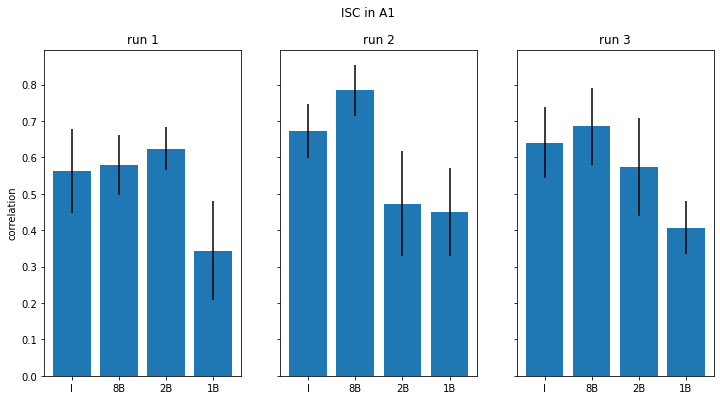

In [45]:
roi = 'A1'
filepath = 'drive/MyDrive/fMRI_music_data/%s/'%roi

# load data for all subjects from this ROI
run1_data = []
run2_data = []
run3_data = []
for s in range(len(subjects)):
  this_sub = subjects[s]

  # load run 1 data for this subject
  run1_data.append(np.load(filepath+'sub1%s_run1.npy'%this_sub))

  # load run 2 and 3 data for this subject
  this_run23 = np.load(filepath+'sub1%s_runs23.npy'%this_sub)
  run2_data.append(this_run23[:,:no_TRs*no_conds])
  run3_data.append(this_run23[:,no_TRs*no_conds:])

# get all data into 3D arrays
run1 = np.asarray(run1_data)
run2 = np.asarray(run2_data)
run3 = np.asarray(run3_data)

# average over all voxel activity
run1_avg = np.average(run1,axis=1)
run2_avg = np.average(run2,axis=1)
run3_avg = np.average(run3,axis=1)

# stack runs for splitting
all_avg = np.dstack((run1_avg,run2_avg,run3_avg))

# need it to be TRs x voxels x subjects for ISC computation
all_ISC_vals = np.zeros((len(subjects),no_conds,no_runs))
for r in range(no_runs):
  this_run = all_avg[:,:,r]
  this_run = np.reshape(this_run,(no_TRs*no_conds,1,len(subjects)))

  # compute ISC for each condition
  all_ISC_vals[:,0,r] = isc(this_run[:no_TRs,:,:]).flatten()
  all_ISC_vals[:,1,r] = isc(this_run[no_TRs:2*no_TRs,:,:]).flatten()
  all_ISC_vals[:,2,r] = isc(this_run[2*no_TRs:3*no_TRs,:,:]).flatten()
  all_ISC_vals[:,3,r] = isc(this_run[3*no_TRs:,:,:]).flatten()

# compute mean and SD of each condition and run
avg_ISC_vals = np.zeros((no_conds,no_runs))
sd_ISC_vals = np.zeros((no_conds,no_runs))
for r in range(no_runs):
  for c in range(no_conds):
      avg_ISC_vals[c,r] = np.average(all_ISC_vals[:,c,r])
      sd_ISC_vals[c,r] = np.std(all_ISC_vals[:,c,r])

fig,ax = plt.subplots(1,3,sharey=True,figsize=(12,6))
ax[0].set_ylabel('correlation')
fig.suptitle('ISC in %s'%roi)
for r in range(no_runs):
  ax[r].bar(x,avg_ISC_vals[:,r],yerr=sd_ISC_vals[:,r])
  ax[r].set_xticks(x)
  ax[r].set_xticklabels(conds)
  ax[r].set_title('run %d'%(r+1))

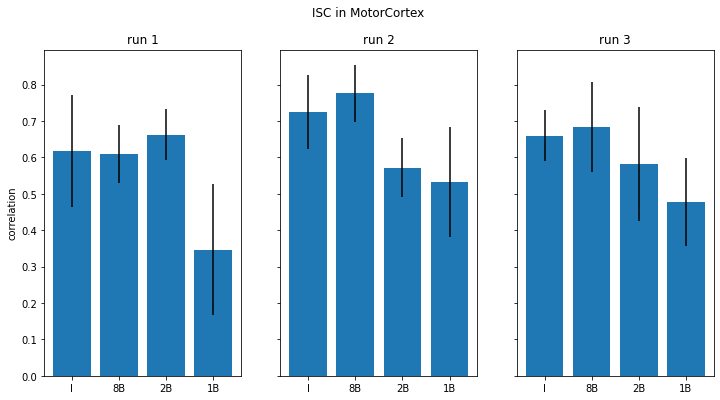

In [48]:
roi = 'MotorCortex'
filepath = 'drive/MyDrive/fMRI_music_data/%s/'%roi

# load data for all subjects from this ROI
run1_data = []
run2_data = []
run3_data = []
for s in range(len(subjects)):
  this_sub = subjects[s]

  # load run 1 data for this subject
  run1_data.append(np.load(filepath+'sub1%s_run1.npy'%this_sub))

  # load run 2 and 3 data for this subject
  this_run23 = np.load(filepath+'sub1%s_runs23.npy'%this_sub)
  run2_data.append(this_run23[:,:no_TRs*no_conds])
  run3_data.append(this_run23[:,no_TRs*no_conds:])

# get all data into 3D arrays
run1 = np.asarray(run1_data)
run2 = np.asarray(run2_data)
run3 = np.asarray(run3_data)

# average over all voxel activity
run1_avg = np.average(run1,axis=1)
run2_avg = np.average(run2,axis=1)
run3_avg = np.average(run3,axis=1)

# stack runs for splitting
all_avg = np.dstack((run1_avg,run2_avg,run3_avg))

# need it to be TRs x voxels x subjects for ISC computation
all_ISC_vals = np.zeros((len(subjects),no_conds,no_runs))
for r in range(no_runs):
  this_run = all_avg[:,:,r]
  this_run = np.reshape(this_run,(no_TRs*no_conds,1,len(subjects)))

  # compute ISC for each condition
  all_ISC_vals[:,0,r] = isc(this_run[:no_TRs,:,:]).flatten()
  all_ISC_vals[:,1,r] = isc(this_run[no_TRs:2*no_TRs,:,:]).flatten()
  all_ISC_vals[:,2,r] = isc(this_run[2*no_TRs:3*no_TRs,:,:]).flatten()
  all_ISC_vals[:,3,r] = isc(this_run[3*no_TRs:,:,:]).flatten()

# compute mean and SD of each condition and run
avg_ISC_vals = np.zeros((no_conds,no_runs))
sd_ISC_vals = np.zeros((no_conds,no_runs))
for r in range(no_runs):
  for c in range(no_conds):
      avg_ISC_vals[c,r] = np.average(all_ISC_vals[:,c,r])
      sd_ISC_vals[c,r] = np.std(all_ISC_vals[:,c,r])

fig,ax = plt.subplots(1,3,sharey=True,figsize=(12,6))
ax[0].set_ylabel('correlation')
fig.suptitle('ISC in %s'%roi)
for r in range(no_runs):
  ax[r].bar(x,avg_ISC_vals[:,r],yerr=sd_ISC_vals[:,r])
  ax[r].set_xticks(x)
  ax[r].set_xticklabels(conds)
  ax[r].set_title('run %d'%(r+1))

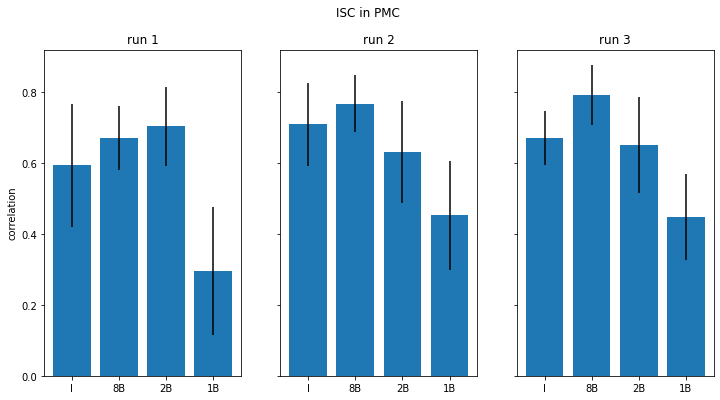

In [47]:
roi = 'PMC'
filepath = 'drive/MyDrive/fMRI_music_data/%s/'%roi

# load data for all subjects from this ROI
run1_data = []
run2_data = []
run3_data = []
for s in range(len(subjects)):
  this_sub = subjects[s]

  # load run 1 data for this subject
  run1_data.append(np.load(filepath+'sub1%s_run1.npy'%this_sub))

  # load run 2 and 3 data for this subject
  this_run23 = np.load(filepath+'sub1%s_runs23.npy'%this_sub)
  run2_data.append(this_run23[:,:no_TRs*no_conds])
  run3_data.append(this_run23[:,no_TRs*no_conds:])

# get all data into 3D arrays
run1 = np.asarray(run1_data)
run2 = np.asarray(run2_data)
run3 = np.asarray(run3_data)

# average over all voxel activity
run1_avg = np.average(run1,axis=1)
run2_avg = np.average(run2,axis=1)
run3_avg = np.average(run3,axis=1)

# stack runs for splitting
all_avg = np.dstack((run1_avg,run2_avg,run3_avg))

# need it to be TRs x voxels x subjects for ISC computation
all_ISC_vals = np.zeros((len(subjects),no_conds,no_runs))
for r in range(no_runs):
  this_run = all_avg[:,:,r]
  this_run = np.reshape(this_run,(no_TRs*no_conds,1,len(subjects)))

  # compute ISC for each condition
  all_ISC_vals[:,0,r] = isc(this_run[:no_TRs,:,:]).flatten()
  all_ISC_vals[:,1,r] = isc(this_run[no_TRs:2*no_TRs,:,:]).flatten()
  all_ISC_vals[:,2,r] = isc(this_run[2*no_TRs:3*no_TRs,:,:]).flatten()
  all_ISC_vals[:,3,r] = isc(this_run[3*no_TRs:,:,:]).flatten()

# compute mean and SD of each condition and run
avg_ISC_vals = np.zeros((no_conds,no_runs))
sd_ISC_vals = np.zeros((no_conds,no_runs))
for r in range(no_runs):
  for c in range(no_conds):
      avg_ISC_vals[c,r] = np.average(all_ISC_vals[:,c,r])
      sd_ISC_vals[c,r] = np.std(all_ISC_vals[:,c,r])

fig,ax = plt.subplots(1,3,sharey=True,figsize=(12,6))
ax[0].set_ylabel('correlation')
fig.suptitle('ISC in %s'%roi)
for r in range(no_runs):
  ax[r].bar(x,avg_ISC_vals[:,r],yerr=sd_ISC_vals[:,r])
  ax[r].set_xticks(x)
  ax[r].set_xticklabels(conds)
  ax[r].set_title('run %d'%(r+1))